In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data)

In [5]:
iris_data.columns = iris.feature_names

In [6]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
iris_data.shape

(150, 4)

In [12]:
X = iris.data
y = iris.target

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.25)

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
X_train_scaled

array([[ 2.2256217 , -1.08471126,  1.7819506 ,  1.44375315],
       [ 1.26827314,  0.04645877,  0.77482629,  1.44375315],
       [-1.00542968,  0.72516079, -1.18347098, -1.02396308],
       [-1.00542968,  0.95139479, -1.18347098, -0.76420347],
       [-0.76609254, -0.85847725,  0.10341009,  0.27483494],
       [-1.60377252, -1.76341327, -1.35132503, -1.15384288],
       [ 0.55026173,  0.49892678,  0.55102089,  0.53459454],
       [-0.76609254,  2.30879882, -1.23942233, -1.41360248],
       [ 1.26827314,  0.04645877,  0.66292359,  0.40471474],
       [ 0.07158745,  0.27269277,  0.60697224,  0.79435414],
       [-0.28741826, -0.63224325,  0.66292359,  1.05411374],
       [ 1.028936  ,  0.49892678,  1.11053439,  1.70351275],
       [ 0.43059316, -1.98964728,  0.43911819,  0.40471474],
       [ 1.62727885,  1.1776288 ,  1.3343398 ,  1.70351275],
       [-0.40708683, -1.53717927, -0.00849262, -0.24468427],
       [ 0.19125602, -0.40600924,  0.43911819,  0.40471474],
       [ 0.6699303 ,  0.

In [17]:
X_train_scaled.shape

(112, 4)

In [19]:
# Apply PCA
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [22]:
pca_scaled_train = pca.fit_transform(X_train_scaled)
pca_scaled_test = pca.fit_transform(X_test_scaled)

In [24]:
pca_scaled_train.shape

(112, 2)

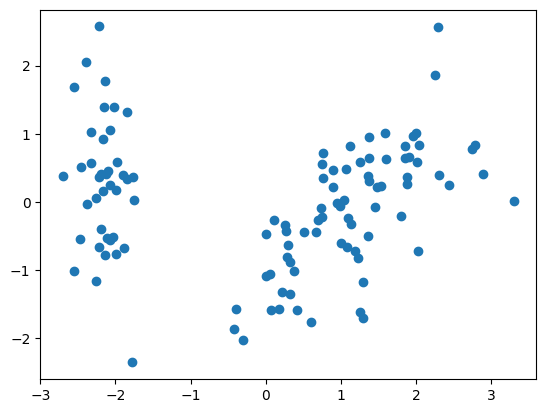

In [29]:

plt.scatter(pca_scaled_train[:,0],pca_scaled_train[:,1])

## Agglomerative Clustering
- To construct a dendogram

Text(0, 0.5, 'Eucledian Distance')

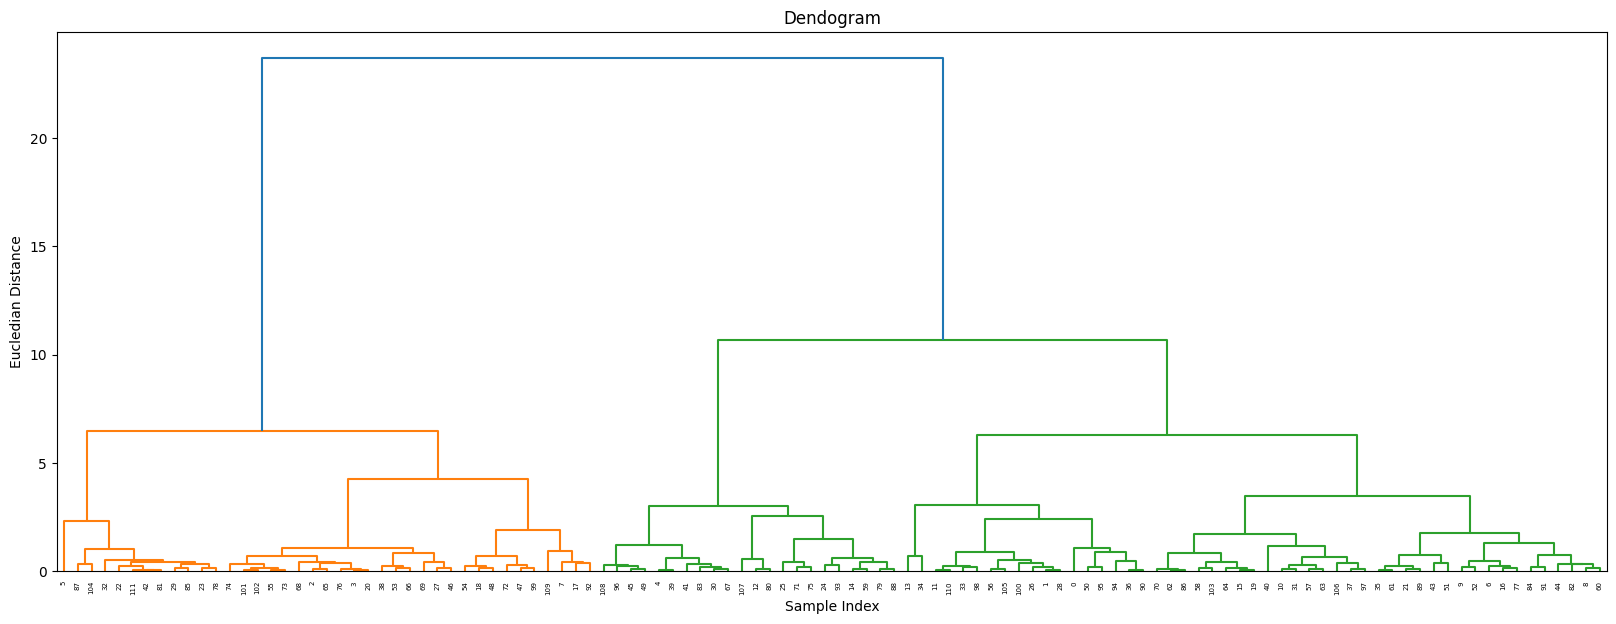

In [30]:
import scipy.cluster.hierarchy as sc
# plot the dendograms
plt.figure(figsize=(20,7))
plt.title("Dendogram")

# create dendograms
sc.dendrogram(sc.linkage(pca_scaled_train, method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

Text(0, 0.5, 'Eucledian Distance')

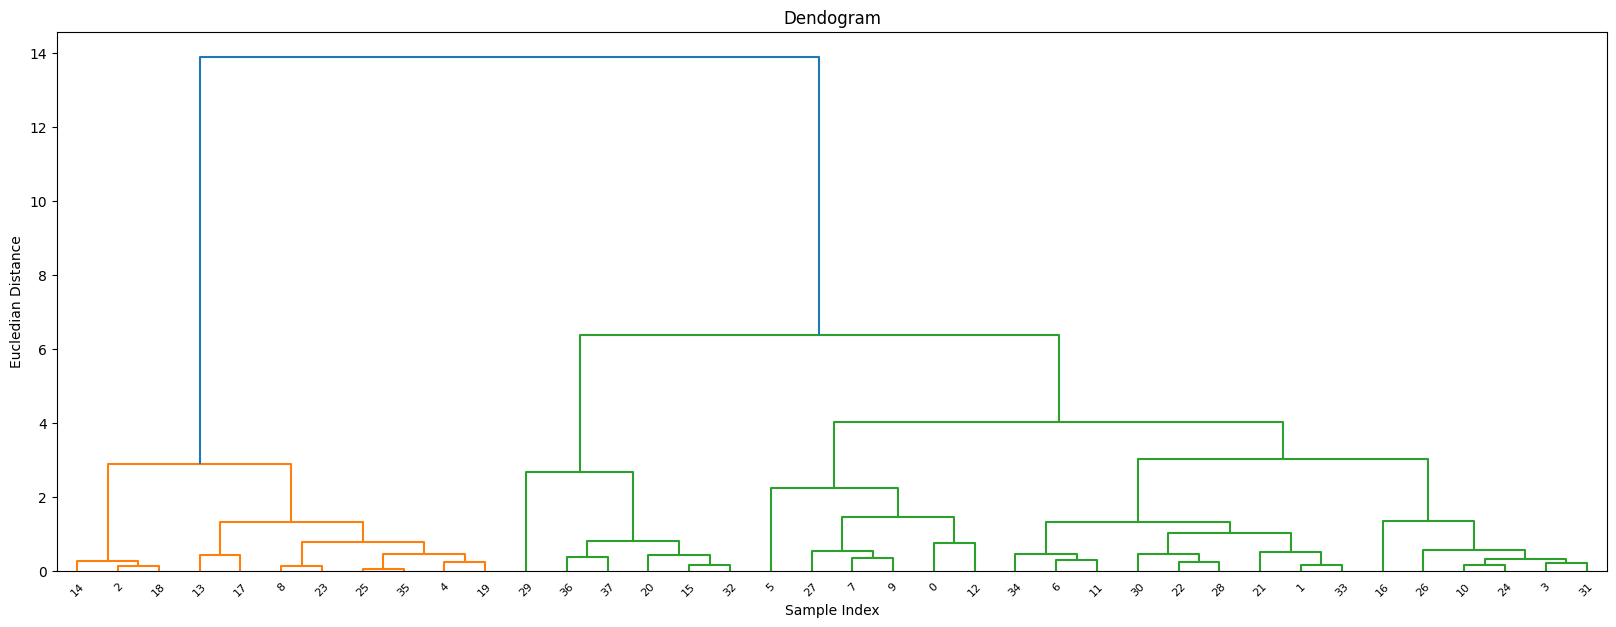

In [31]:
import scipy.cluster.hierarchy as sc
# plot the dendograms
plt.figure(figsize=(20,7))
plt.title("Dendogram")

# create dendograms
sc.dendrogram(sc.linkage(pca_scaled_test, method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [32]:
from sklearn.cluster import AgglomerativeClustering
clusture = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusture.fit(pca_scaled_train)

/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [ ]:
clusture.fit(pca_scaled_train)

In [33]:
clusture.labels_

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1])

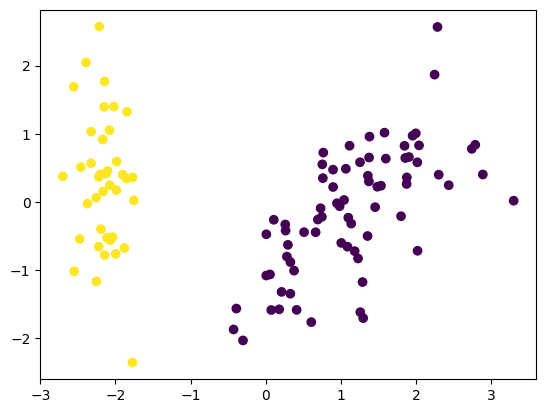

In [34]:
plt.scatter(pca_scaled_train[:,0],pca_scaled_train[:,1], c=clusture.labels_)

In [35]:
## silhouette score
from sklearn.metrics import silhouette_score

In [40]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anmol/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` w

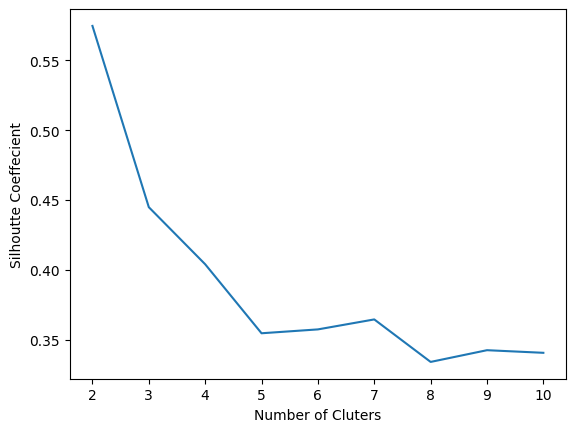

In [41]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()